<a href="https://colab.research.google.com/github/TiagoLinharess/ml_modelo_doenca_cardiovascular/blob/main/ML_modelo_doenca_cardiaca1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning para diagnóstico de doenças cardiovaculares**

O objetivo desse ML é poder analisar os dados de uma pessoa como idade, sexo, colesterol, presão aterial e entre outros. Com o objetivo de poder identificar se com base nos dados, a pessoa possui ou não alguma doença cardiovascular.

#Carga do Dataset

Vamos carregar o dataset que possui os dados no qual iremos treinar o ML para fazer o diagnóstico.

Informações sobre os atributos:

**age** - idade em anos;

**sex** - sexo do paciente sendo 0 mulher e 1 homem;

**cp** - tipo da dor torácica sendo 1: angina típica; 2: angina atípica; 3: dor não cardíaca; 4: assintomática;

**trestbps** - pressão arterial em repouso;

**chol** - colesterol sérico (mg/dl);

**fbs** - açucar no sangue em jejum > 120mg/dl sendo 0: não; 1: sim;

**restecg** - resultado do eletrocardiografia de repouso sendo 0: normal; 1: anormalidades de ST-T (inversão da onda T e elevação ou depressão de > 0.05mV); 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)

**thalach** - frequência cardíaca máxima atingida;

**exang** - angina induzida pelo exercício sendo 0: não; 1: sim

**oldpeak** - depessão do segmento ST induzida pelo exercício em relação ao repouso;

**slope** - inclinação do segmento ST no pico do exercício;

**ca** - número de vasos principais colorido por fluoroscopia;

**thal** - teste de esforço cardíaco sendo 3: normal; 6: defeito fixo; 7: defeito reversível

**num** - diagnóstico de doença cardíaca (diagnóstico angiográfico) sendo 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro); 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

In [ ]:
import pandas as pd

# Carregar o dataset diretamente de uma URL
url = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"
data = pd.read_csv(url, delimiter=',')

# Exibir as primeiras linhas do dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Como podemos ver, já é possível analisar e tratar os dados, como por exemplo a comparação abaixo da idade das mulheres e dos homens na base de dados utilizada.

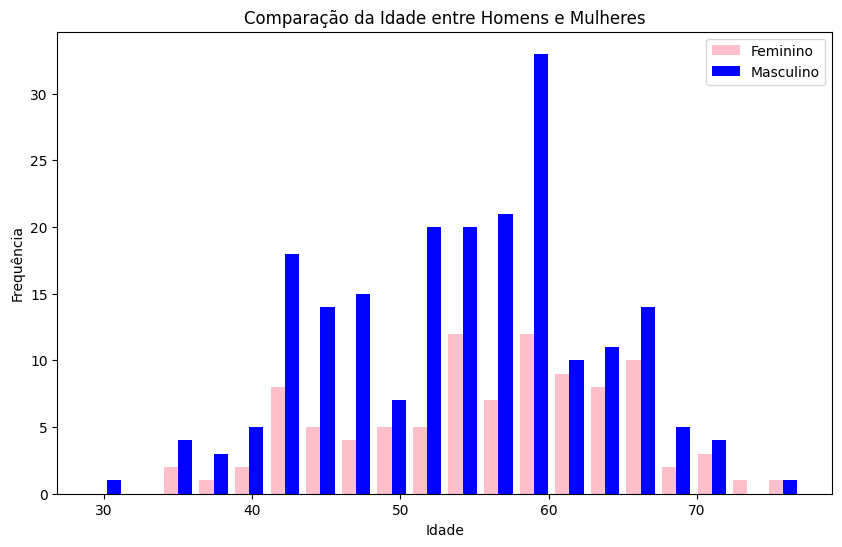

In [ ]:
import matplotlib.pyplot as plt

# Criar um gráfico de comparação da idade entre homens e mulheres
plt.figure(figsize=(10, 6))
plt.hist([data.loc[data['sex'] == 0, 'age'], data.loc[data['sex'] == 1, 'age']], bins=20, label=['Feminino', 'Masculino'], color=['pink', 'blue'])
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Comparação da Idade entre Homens e Mulheres')
plt.legend()
plt.show()


Ou nesse gráfico aqui, que mostra mais uma comparação entre homens e mulheres, mas desta vez mostra os que possuem doenças cardiovasculares de acordo com a sua idade.

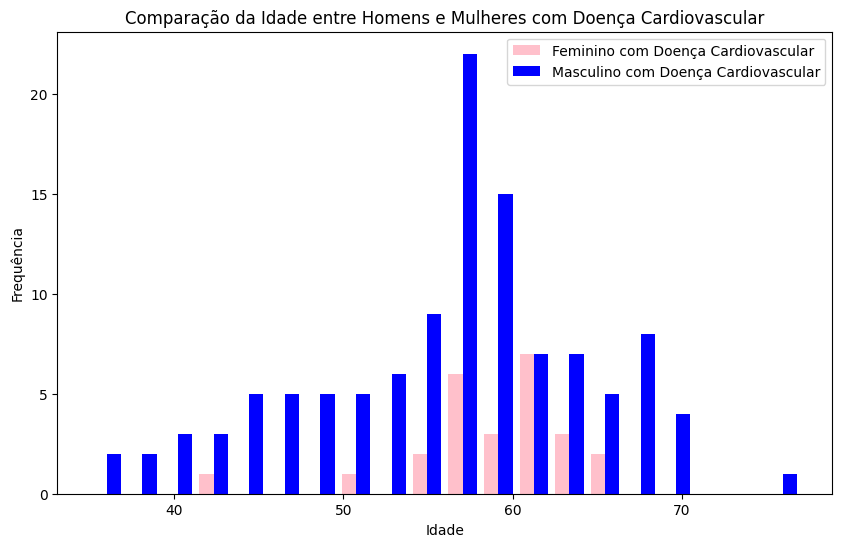

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist([data.loc[(data['sex'] == 0) & (data['num'] > 0), 'age'],
          data.loc[(data['sex'] == 1) & (data['num'] > 0), 'age']],
         bins=20, label=['Feminino com Doença Cardiovascular', 'Masculino com Doença Cardiovascular'],
         color=['pink', 'blue'])
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Comparação da Idade entre Homens e Mulheres com Doença Cardiovascular')
plt.legend()
plt.show()


#Pré-processamento d dados

Aqui nós iremos pegar os dados, e processa-los para poder definir qual será a carga de testes, qual será o item q ser testado aleatóriamente, com o intuito de preparar o modelo para o seu treinamento.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar as features e o target
X = data.drop('num', axis=1)
y = data['num']

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Treinamento dos Modelos

Na etapa de treinamento, vamos criar os classificadores e as árvores de decisão que serão treinados para poder efetuar os diagnósticos.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_scores = cross_val_score(knn, X_train, y_train, cv=5)

# Árvore de Decisão
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_scores = cross_val_score(tree, X_train, y_train, cv=5)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_scores = cross_val_score(nb, X_train, y_train, cv=5)

# SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_scores = cross_val_score(svm, X_train, y_train, cv=5)

# Exibir os resultados
print(f"KNN Accuracy: {knn_scores.mean()}")
print(f"Decision Tree Accuracy: {tree_scores.mean()}")
print(f"Naive Bayes Accuracy: {nb_scores.mean()}")
print(f"SVM Accuracy: {svm_scores.mean()}")

KNN Accuracy: 0.5788265306122449
Decision Tree Accuracy: 0.48767006802721086
Naive Bayes Accuracy: 0.35603741496598634
SVM Accuracy: 0.5950680272108844


#Otimização de Hiperparâmetros

Iremos otimizar os hiperparâmetros para ver qual o melhor para o nosso objetivo, assim tendo uma melhor precisão nos resultados.

In [7]:
from sklearn.model_selection import GridSearchCV

# Exemplo de otimização de hiperparâmetros para o KNN
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Melhor parâmetro para KNN: {grid_search.best_params_}")

Melhor parâmetro para KNN: {'n_neighbors': 9}


#Finalização do modelo

Aqui nós temos a etapa final do modelo, onde iremos medir a precisão do mesmo.

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Avaliação no conjunto de teste
y_pred = knn.predict(X_test)

# Para problemas multiclasse, especifique o parâmetro 'average'
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision (weighted): {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall (weighted): {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score (weighted): {f1_score(y_test, y_pred, average='weighted')}")

Accuracy: 0.5573770491803278
Precision (weighted): 0.47908986325724895
Recall (weighted): 0.5573770491803278
F1 Score (weighted): 0.50634242314068


## Simulando a aplicação do modelo em dados não vistos

Temos aqui um exemplo de insersão de novos dados para pode obter os resultados baseado no ML acima, entregando a predição de doenças cardiovasculares, sendo 0 quem não possui, e maior que 0 quem possui alguma doença.

In [9]:
import numpy as np

# Exemplo de novos dados (não vistos pelo modelo)
# Cada linha representa um novo exemplo com as mesmas features do dataset original
new_data = np.array([[63, 1, 3, 160, 285, 1, 2, 200, 1, 3.5, 3, 3, 7],  # Exemplo 1
                     [37, 0, 2, 130, 250, 0, 1, 187, 0, 3.5, 0, 0, 2],  # Exemplo 2
                     [41, 1, 1, 130, 204, 0, 0, 172, 0, 1.4, 2, 0, 2]]) # Exemplo 3

# Nomes das colunas do dataset original
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Converter o array new_data em um DataFrame com os nomes das colunas
new_data_df = pd.DataFrame(new_data, columns=column_names)

# Normalizar os novos dados com o mesmo scaler usado no treinamento
new_data_scaled = scaler.transform(new_data_df)

# Fazer a predição com o modelo treinado
predictions = knn.predict(new_data_scaled)

# Exibir as predições
for i, pred in enumerate(predictions):
    print(f"Exemplo {i+1}: Predição = {pred}")

Exemplo 1: Predição = 3
Exemplo 2: Predição = 0
Exemplo 3: Predição = 0
